In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('nba2122.xlsx') #loading data

In [3]:
data

,Team,Age,SOS,ORtg,DRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,Result,Season,Conference
0,Utah Jazz,28.5,-0.29,117.6,108.3,98.5,0.244,0.488,0.597,0.563,12.7,24.5,0.195,Playoffs,2020-2021,W
1,Los Angeles Clippers,28.8,-0.16,117.6,111.2,96.9,0.222,0.400,0.599,0.564,12.2,22.7,0.186,Playoffs,2020-2021,W
2,Phoenix Suns,26.6,-0.15,117.2,111.3,97.2,0.212,0.392,0.597,0.564,11.5,20.8,0.177,Playoffs,2020-2021,W
3,Milwaukee Bucks,28.1,-0.32,117.2,111.4,102.2,0.233,0.404,0.593,0.566,12.0,23.3,0.177,Playoffs,2020-2021,E
4,Philadelphia 76ers,27.1,-0.31,113.2,107.6,99.5,0.293,0.347,0.579,0.541,12.8,23.2,0.225,Playoffs,2020-2021,E
5,Denver Nuggets,26.1,-0.11,117.1,112.1,97.1,0.219,0.383,0.588,0.557,12.1,24.7,0.176,Playoffs,2020-2021,W
6,Brooklyn Nets,28.2,-0.27,118.3,113.8,99.5,0.258,0.413,0.610,0.575,12.2,21.4,0.208,Playoffs,2020-2021,E
7,Los Angeles Lakers,28.2,-0.03,109.9,107.1,98.7,0.271,0.363,0.569,0.536,13.6,22.5,0.200,Play-in,2020-2021,W
8,Dallas Mavericks,26.3,-0.01,115.4,113.0,97.3,0.242,0.436,0.582,0.550,11.1,21.1,0.189,Playoffs,2020-2021,W
9,New York Knicks,25.6,-0.18,110.6,108.2,95.9,0.242,0.347,0.559,0.524,11.9,21.9,0.190,Playoffs,2020-2021,E


In [4]:
#division into conferences
east = data[data['Conference']=='E'].reset_index(drop=True)
west = data[data['Conference']=='W'].reset_index(drop=True)

In [5]:
print(len(east), len(west))

30 30


In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Eastern conference

In [7]:
#numeric stats
east_stats = east.iloc[:,1:13]
east_stats.head()

,Age,SOS,ORtg,DRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA
0,28.1,-0.32,117.2,111.4,102.2,0.233,0.404,0.593,0.566,12.0,23.3,0.177
1,27.1,-0.31,113.2,107.6,99.5,0.293,0.347,0.579,0.541,12.8,23.2,0.225
2,28.2,-0.27,118.3,113.8,99.5,0.258,0.413,0.610,0.575,12.2,21.4,0.208
3,25.6,-0.18,110.6,108.2,95.9,0.242,0.347,0.559,0.524,11.9,21.9,0.190
4,25.4,-0.18,115.7,113.3,97.6,0.278,0.382,0.581,0.539,11.9,24.4,0.226


In [8]:
#scaling
east_stats_scaled = pd.DataFrame(StandardScaler().fit(east_stats).transform(east_stats))
east_stats_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.430250,-1.663011,1.544243,-0.327886,2.001103,-0.833331,0.468675,1.382789,1.769664,-0.480549,0.305221,-1.099835
1,0.729147,-1.608664,0.354839,-2.082769,0.604985,2.084950,-1.285009,0.600078,0.429009,0.577541,0.253195,1.743545
2,1.500360,-1.391277,1.871330,0.780461,0.604985,0.382619,0.745572,2.333224,2.252299,-0.216027,-0.683279,0.736514
3,-0.322507,-0.902156,-0.418274,-1.805682,-1.256506,-0.395589,-1.285009,-0.518080,-0.482636,-0.612811,-0.423147,-0.329753
4,-0.462728,-0.902156,1.098217,0.549555,-0.377469,1.355379,-0.208186,0.711894,0.321757,-0.612811,0.877510,1.802782


In [9]:
#creating KMeans model and fitting to data
kmeans_e = KMeans(n_clusters=2, random_state=0).fit(east_stats_scaled)
len(kmeans_e.labels_)

30

In [10]:
kmeans_e.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0])

In [11]:
kmeans_result_e = np.select([kmeans_e.labels_==1,kmeans_e.labels_==0],['Playoffs','Out'])

In [12]:
east['KMeans'] = kmeans_result_e
comparison_e = east.loc[:,['Result','KMeans']]

In [13]:
#Result of clustering for non play-in teams
comparison_no_plin_e = comparison_e[comparison_e['Result']!='Play-in']
comparison_no_plin_e

,Result,KMeans
0,Playoffs,Playoffs
1,Playoffs,Playoffs
2,Playoffs,Playoffs
3,Playoffs,Playoffs
4,Playoffs,Playoffs
6,Playoffs,Playoffs
8,Out,Playoffs
9,Out,Playoffs
12,Out,Out
13,Out,Out


In [14]:
#accuracy
acc = (comparison_no_plin_e.Result==comparison_no_plin_e.KMeans).mean()
print("%.2f%%"%(acc*100))

86.36%


In [15]:
#results of clustering for play-in teams
comparison_plin_e = comparison_e[comparison_e['Result']=='Play-in'].copy()
comparison_plin_e

,Result,KMeans
5,Play-in,Playoffs
7,Play-in,Playoffs
10,Play-in,Playoffs
11,Play-in,Out
20,Play-in,Playoffs
21,Play-in,Playoffs
22,Play-in,Playoffs
23,Play-in,Playoffs


In [16]:
plin_e_index = list(east[east['Result']=='Play-in'].index)

In [17]:
east.iloc[plin_e_index,:]

,Team,Age,SOS,ORtg,DRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,Result,Season,Conference,KMeans
5,Boston Celtics,25.1,-0.14,114.0,112.5,98.3,0.234,0.409,0.574,0.543,12.5,24.3,0.181,Play-in,2020-2021,E,Playoffs
7,Indiana Pacers,26.5,-0.08,112.4,112.4,101.6,0.227,0.372,0.575,0.542,11.9,20.2,0.180,Play-in,2020-2021,E,Playoffs
10,Washington Wizards,26.6,-0.01,111.2,113.0,104.1,0.288,0.319,0.569,0.531,12.3,21.3,0.221,Play-in,2020-2021,E,Playoffs
11,Charlotte Hornets,24.6,-0.01,110.9,112.8,98.3,0.238,0.422,0.564,0.532,13.3,23.5,0.181,Play-in,2020-2021,E,Out
20,Cleveland Cavaliers,24.7,-0.08,111.9,109.7,96.1,0.261,0.387,0.571,0.538,13.2,24.0,0.198,Play-in,2021-2022,E,Playoffs
21,Atlanta Hawks,26.1,-0.01,116.5,114.9,97.7,0.253,0.390,0.581,0.543,10.8,23.0,0.205,Play-in,2021-2022,E,Playoffs
22,Brooklyn Nets,29.1,0.04,113.6,112.8,99.0,0.246,0.359,0.576,0.540,12.5,23.9,0.198,Play-in,2021-2022,E,Playoffs
23,Charlotte Hornets,25.5,0.09,114.1,113.7,100.0,0.234,0.418,0.572,0.544,11.6,23.3,0.173,Play-in,2021-2022,E,Playoffs


In [18]:
#further analysis - which of these teams won a spot in the playoffs?
comparison_plin_e['Playoffs?'] = ['Playoffs','Out','Playoffs','Out','Out','Playoffs','Playoffs','Out']
comparison_plin_e

,Result,KMeans,Playoffs?
5,Play-in,Playoffs,Playoffs
7,Play-in,Playoffs,Out
10,Play-in,Playoffs,Playoffs
11,Play-in,Out,Out
20,Play-in,Playoffs,Out
21,Play-in,Playoffs,Playoffs
22,Play-in,Playoffs,Playoffs
23,Play-in,Playoffs,Out


In [19]:
import umap
import matplotlib.pyplot as plt

In [20]:
#transforming numeric data to 2 dimensions
model = umap.UMAP(random_state=42)
umap_embedding = model.fit(east_stats_scaled).transform(east_stats_scaled)

In [21]:
play_e_index = list(east[east['Result']=='Playoffs'].index)
out_e_index = list(east[east['Result']=='Out'].index)

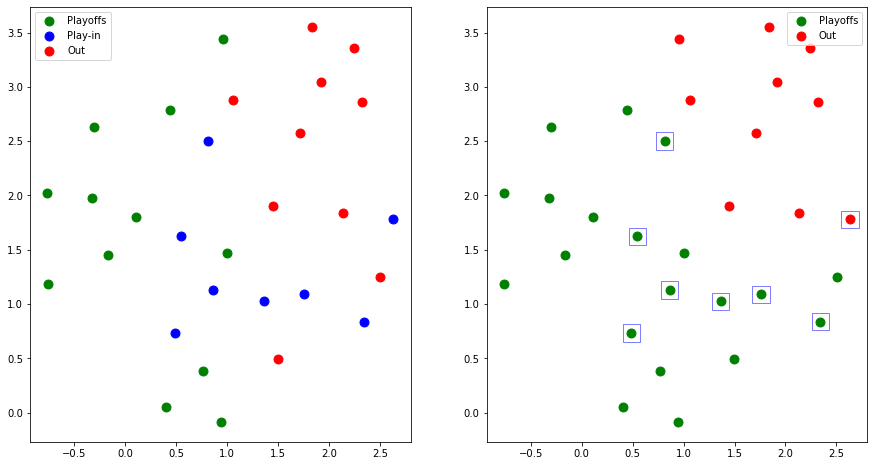

In [22]:
#visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.scatter(umap_embedding[play_e_index,0], umap_embedding[play_e_index,1], color='green', label="Playoffs", s=80)
ax1.scatter(umap_embedding[plin_e_index,0], umap_embedding[plin_e_index,1], color='blue', label="Play-in", s=80)
ax1.scatter(umap_embedding[out_e_index,0], umap_embedding[out_e_index,1], color='red', label="Out", s=80)
ax1.legend()

ax2.scatter(umap_embedding[east[east['KMeans']=='Playoffs'].index,0], umap_embedding[east[east['KMeans']=='Playoffs'].index,1], color='green', label="Playoffs", s=80)
ax2.scatter(umap_embedding[plin_e_index,0], umap_embedding[plin_e_index,1], facecolors='none', edgecolors='blue', s=300, marker='s', alpha=0.5)
ax2.scatter(umap_embedding[east[east['KMeans']=='Out'].index,0], umap_embedding[east[east['KMeans']=='Out'].index,1], color='red', label="Out", s=80)
ax2.legend()

plt.show()

# Western conference

In [23]:
#numeric stats
west_stats = west.iloc[:,1:13]
west_stats.head()

,Age,SOS,ORtg,DRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA
0,28.5,-0.29,117.6,108.3,98.5,0.244,0.488,0.597,0.563,12.7,24.5,0.195
1,28.8,-0.16,117.6,111.2,96.9,0.222,0.400,0.599,0.564,12.2,22.7,0.186
2,26.6,-0.15,117.2,111.3,97.2,0.212,0.392,0.597,0.564,11.5,20.8,0.177
3,26.1,-0.11,117.1,112.1,97.1,0.219,0.383,0.588,0.557,12.1,24.7,0.176
4,28.2,-0.03,109.9,107.1,98.7,0.271,0.363,0.569,0.536,13.6,22.5,0.200


In [24]:
#scaling
west_stats_scaled = pd.DataFrame(StandardScaler().fit(west_stats).transform(west_stats))
west_stats_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.226987,-1.293813,1.416227,-1.362184,-0.348107,-0.062282,1.933359,1.601061,1.527444,0.350701,0.764917,0.532575
1,1.383847,-0.737488,1.416227,-0.341426,-1.319568,-1.204116,-0.061976,1.718354,1.585448,-0.136384,0.002823,-0.244697
2,0.233546,-0.694694,1.308937,-0.306227,-1.137419,-1.723132,-0.243370,1.601061,1.585448,-0.818303,-0.801611,-1.021969
3,-0.027886,-0.523516,1.282114,-0.024639,-1.198135,-1.359821,-0.447439,1.073238,1.179419,-0.233801,0.849595,-1.108333
4,1.070128,-0.181162,-0.649104,-1.784566,-0.226674,1.339060,-0.900924,-0.041053,-0.038669,1.227454,-0.081855,0.964393


In [25]:
#creating KMeans model and fitting to data
kmeans_w = KMeans(n_clusters=2, random_state=0).fit(west_stats_scaled)
len(kmeans_w.labels_)

30

In [26]:
kmeans_w.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0])

In [27]:
kmeans_result_w = np.select([kmeans_w.labels_==1,kmeans_w.labels_==0],['Playoffs','Out'])

In [28]:
west['KMeans'] = kmeans_result_w
comparison_w = west.loc[:,['Result','KMeans']]

In [29]:
#result of clustering for non play-in teams
comparison_no_plin_w = comparison_w[comparison_w['Result']!='Play-in']
comparison_no_plin_w

,Result,KMeans
0,Playoffs,Playoffs
1,Playoffs,Playoffs
2,Playoffs,Playoffs
3,Playoffs,Playoffs
5,Playoffs,Playoffs
6,Playoffs,Playoffs
9,Out,Out
11,Out,Out
12,Out,Out
13,Out,Out


In [30]:
#accuracy
acc = (comparison_no_plin_w.Result==comparison_no_plin_w.KMeans).mean()
print("%.2f%%"%(acc*100))

90.91%


In [31]:
#result of clustering for play-in teams
comparison_plin_w = comparison_w[comparison_w['Result']=='Play-in'].copy()
comparison_plin_w

,Result,KMeans
4,Play-in,Playoffs
7,Play-in,Playoffs
8,Play-in,Out
10,Play-in,Out
20,Play-in,Playoffs
22,Play-in,Out
23,Play-in,Playoffs
24,Play-in,Out


In [32]:
plin_w_index = list(west[west['Result']=='Play-in'].index)

In [33]:
west.iloc[plin_w_index,:]

,Team,Age,SOS,ORtg,DRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,Result,Season,Conference,KMeans
4,Los Angeles Lakers,28.2,-0.03,109.9,107.1,98.7,0.271,0.363,0.569,0.536,13.6,22.5,0.200,Play-in,2020-2021,W,Playoffs
7,Golden State Warriors,26.7,0.04,111.1,110.1,102.2,0.239,0.439,0.583,0.551,13.3,17.9,0.188,Play-in,2020-2021,W,Playoffs
8,Memphis Grizzlies,24.2,0.04,112.0,111.0,100.4,0.232,0.342,0.560,0.528,11.6,24.2,0.179,Play-in,2020-2021,W,Out
10,San Antonio Spurs,26.2,0.15,111.0,112.8,98.9,0.243,0.314,0.554,0.517,10.2,20.0,0.192,Play-in,2020-2021,W,Out
20,Minnesota Timberwolves,24.2,-0.10,114.3,111.7,100.9,0.254,0.454,0.573,0.539,12.4,24.4,0.198,Play-in,2021-2022,W,Playoffs
22,San Antonio Spurs,24.5,-0.10,112.4,112.3,100.0,0.220,0.345,0.556,0.527,11.1,23.7,0.166,Play-in,2021-2022,W,Out
23,Los Angeles Clippers,27.5,0.06,110.1,110.1,98.0,0.224,0.391,0.564,0.531,12.5,20.6,0.178,Play-in,2021-2022,W,Playoffs
24,New Orleans Pelicans,25.6,0.15,112.0,113.0,97.2,0.264,0.365,0.557,0.517,12.5,26.9,0.208,Play-in,2021-2022,W,Out


In [34]:
#further analysis - which of these teams won a spot in the playoffs?
comparison_plin_w['Playoffs?'] = ['Playoffs','Out','Playoffs','Out','Playoffs','Out','Out','Playoffs']
comparison_plin_w

,Result,KMeans,Playoffs?
4,Play-in,Playoffs,Playoffs
7,Play-in,Playoffs,Out
8,Play-in,Out,Playoffs
10,Play-in,Out,Out
20,Play-in,Playoffs,Playoffs
22,Play-in,Out,Out
23,Play-in,Playoffs,Out
24,Play-in,Out,Playoffs


In [35]:
#transforming numeric data to 2 dimensions
model = umap.UMAP(random_state=42)
umap_embedding = model.fit(west_stats_scaled).transform(west_stats_scaled)

In [36]:
play_w_index = list(west[west['Result']=='Playoffs'].index)
out_w_index = list(west[west['Result']=='Out'].index)

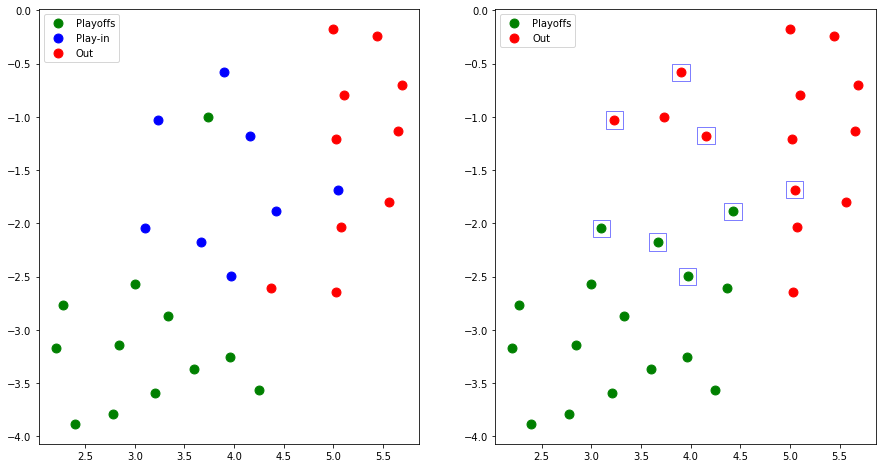

In [37]:
#visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.scatter(umap_embedding[play_w_index,0], umap_embedding[play_w_index,1], color='green', label="Playoffs", s=80)
ax1.scatter(umap_embedding[plin_w_index,0], umap_embedding[plin_w_index,1], color='blue', label="Play-in", s=80)
ax1.scatter(umap_embedding[out_w_index,0], umap_embedding[out_w_index,1], color='red', label="Out", s=80)
ax1.legend()

ax2.scatter(umap_embedding[west[west['KMeans']=='Playoffs'].index,0], umap_embedding[west[west['KMeans']=='Playoffs'].index,1], color='green', label="Playoffs", s=80)
ax2.scatter(umap_embedding[plin_w_index,0], umap_embedding[plin_w_index,1], facecolors='none', edgecolors='blue', s=300, marker='s', alpha=0.5)
ax2.scatter(umap_embedding[west[west['KMeans']=='Out'].index,0], umap_embedding[west[west['KMeans']=='Out'].index,1], color='red', label="Out", s=80)
ax2.legend()

plt.show()